In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd,QuarterEnd

In [2]:
df = pd.read_csv('./Data/pp-complete-28022023.csv',names=['Trans_id', 'price', 'date', 'postcode', 'Property', 'Age','Duration',
                            'PAON', 'SOAN', 'Street', 'Locality', 'Town', 'District', 'County',
                            'PPD', 'Rec_Status'])
df.head()

,Trans_id,price,date,postcode,Property,Age,Duration,PAON,SOAN,Street,Locality,Town,District,County,PPD,Rec_Status
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31 00:00,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09 00:00,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31 00:00,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04 00:00,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22 00:00,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A


In [3]:
# Converting Date to datetime format
df['transaction_date'] = pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M')
df['transaction_quarter'] = df.transaction_date + QuarterEnd(0,normalize=True)

df['Postcode'] = df.postcode.replace(" ", "",regex=True).str.upper()
df['Postcode_Dstr'] = df.Postcode.str[:-3]
df['Postcode_Area'] = df.Postcode_Dstr.str.extract('([A-Z]*)', expand=False)
df.head()

,Trans_id,price,date,postcode,Property,Age,Duration,PAON,SOAN,Street,...,Town,District,County,PPD,Rec_Status,transaction_date,transaction_quarter,Postcode,Postcode_Dstr,Postcode_Area
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31 00:00,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,...,TORQUAY,TORBAY,TORBAY,A,A,1995-01-31,1995-03-31,TQ11RY,TQ1,TQ
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09 00:00,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,...,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A,1995-10-09,1995-12-31,L267XJ,L26,L
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31 00:00,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,...,POOLE,POOLE,POOLE,A,A,1995-03-31,1995-03-31,BH122AE,BH12,BH
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04 00:00,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,...,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A,1995-12-04,1995-12-31,IP130DR,IP13,IP
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22 00:00,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,...,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A,1995-09-22,1995-09-30,WS140BE,WS14,WS


<AxesSubplot: xlabel='transaction_quarter'>

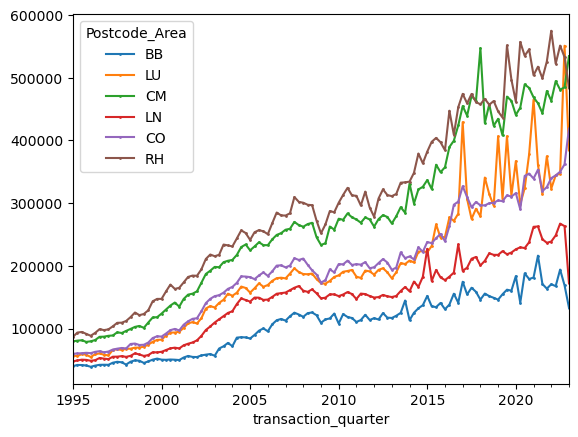

In [4]:
quarter_aggs = df.groupby(['transaction_quarter','Postcode_Area'])['price'].mean().unstack(1)
quarter_aggs.sample(6,axis=1,random_state=34).plot(marker='o',markersize=1.0)

In [5]:
quarter_aggs.shape

(113, 109)

In [12]:
quarter_aggs

Postcode_Area,AL,B,BA,BB,BD,BH,BL,BN,BR,BS,...,W,WA,WC,WD,WF,WN,WR,WS,WV,YO
transaction_quarter,,,,,,,,,,,,,,,,,,,,,
1995-03-31,96491.334582,60409.835279,65703.116605,40080.107961,46690.371570,71081.343082,47932.423490,61686.860265,91395.018375,61453.620295,...,1.536984e+05,65796.889640,1.331080e+05,92791.782037,48847.698957,47051.300349,65880.254598,52977.289881,55211.657952,60440.298901
1995-06-30,98414.031313,60107.596869,68228.799408,41928.243845,47841.274851,74808.993711,49883.279631,64250.116022,97088.031301,62466.186911,...,1.577482e+05,66607.926238,1.140899e+05,92264.320183,49592.977817,47123.201913,69703.891964,55887.168760,57022.115955,61151.436602
1995-09-30,106365.538938,61998.470417,68717.900158,41759.020319,48365.706361,75345.482904,47350.797840,64644.568978,95016.625000,65749.845580,...,1.514879e+05,68292.500990,1.294572e+05,96202.645161,50468.856707,48167.598463,72203.371795,56176.257801,58227.440662,63677.330341
1995-12-31,100814.623094,60535.749692,66201.830327,41081.560193,48142.694931,72226.728159,49285.327737,64056.196437,97523.541028,62101.586400,...,1.540215e+05,65748.616597,1.541717e+05,92675.887955,49814.225389,47290.668274,70992.926040,57698.464722,55156.558453,62630.814402
1996-03-31,100899.009901,57113.404973,65304.152174,39009.667087,46085.467562,72526.626332,46005.463476,62850.586283,95879.613781,60897.651689,...,1.546049e+05,64263.759887,1.003314e+05,89129.949517,48896.307165,46387.947598,68274.400000,54306.319056,53319.363029,61354.669252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,652449.180765,295681.928030,423973.407235,170659.940103,192048.768461,450818.958595,261503.773379,424194.109504,602313.173745,420109.246162,...,1.721238e+06,269607.156132,2.981745e+06,606675.732057,208945.632196,172613.891660,333094.673451,238861.564120,234792.123299,276820.763682
2022-06-30,636307.124533,302339.429462,415051.884807,167683.394827,196812.727181,439687.539203,246370.233555,435999.967218,629616.955266,392962.603957,...,1.665987e+06,282718.260213,3.661326e+06,651185.484185,201438.437186,221353.906196,344294.826540,260658.956618,230007.144444,303106.506745
2022-09-30,707229.538855,318575.839639,428398.585023,194079.460899,200332.040389,452224.433764,217003.016000,478434.320706,623501.907771,395661.056954,...,1.496958e+06,296262.657043,3.519865e+06,625780.420091,207809.641529,190183.379825,369062.653390,259861.862579,252372.990476,305412.592280


In [13]:
quarter_aggs_growth = quarter_aggs.pct_change()

In [14]:
corr = quarter_aggs_growth.corr()

In [15]:
corr.to_csv('correlations.csv')

<AxesSubplot: xlabel='transaction_quarter'>

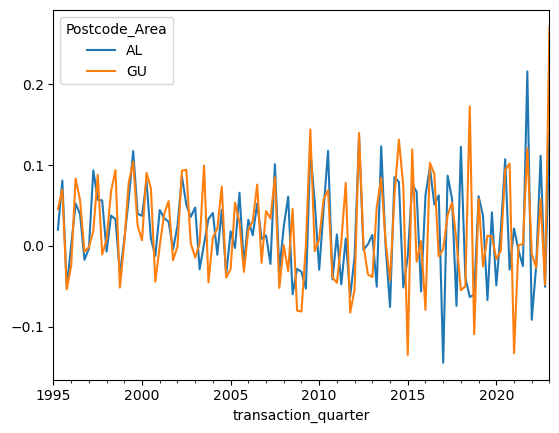

In [16]:
quarter_aggs_growth[['AL','GU']].plot()

<AxesSubplot: xlabel='transaction_quarter'>

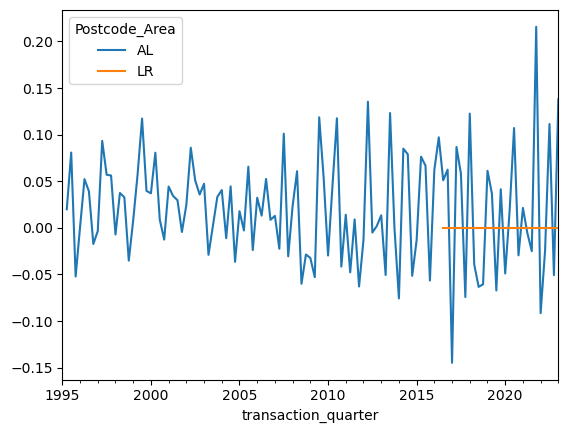

In [17]:
quarter_aggs_growth[['AL','LR']].plot()

In [27]:
import os
quarter_aggs_growth.to_csv(os.path.join(os.getcwd(),'./Data/quarter_aggs_growth.csv'))

Tasks:
- get adjacency matrix (again) - DONE!
- create test train sample and out of time
- see how we prediction goes based on just seasonality and prior quarters performance
- consider adding in some sort of macroeconomics

In [20]:
# Creating the adjacenjy matrix
import shapefile
import itertools
import os
#from haversine import haversine

myshp = open(os.path.join(os.getcwd(),"./Data/shapefiles/Distribution/Areas.shp"), "rb")
mydbf = open(os.path.join(os.getcwd(),"./Data/shapefiles/Distribution/Areas.dbf"), "rb")
myshx= open(os.path.join(os.getcwd(),"./Data/shapefiles/Distribution/Areas.shx"), "rb")

r = shapefile.Reader(shp=myshp, dbf=mydbf, shx=myshx)

In [30]:
r.shapes()[0]

Shape #0: POLYGON

In [21]:
# Getting postcode names
fields = r.records()
fields = [x[0] for x in fields]

# Getting shapes
shapes = r.shapes()

# Compiling into dictionary
data = {keys:values for (keys,values) in zip(fields,shapes)}

In [20]:
from sklearn.metrics.pairwise import haversine_distances
import time

from math import radians, cos, sin, asin, sqrt

def haversine(point1, point2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    assert isinstance(point1,tuple)
    assert isinstance(point2,tuple)

    lon1, lat1 = point1
    lon2, lat2 = point2
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r


def Dist_shp(shp1,shp2,sample_fac=20):
    ''' Takes every twentieth element and checks the distance between them'''
    distances = list()
    for a,b in itertools.product(shp1.points[::sample_fac],shp2.points[::sample_fac]):
        distances.append(haversine(a[::-1],b[::-1]))
    
    if len(distances)>0:
        return min(distances)

def adj_dict(code_lst,data,limit,sample_fac=20):
    ''' function to generate postcode adjacency dictionary. '''

    # check which codes don't exist in the dataframe
    

    adj_matrix = np.empty([len(code_lst),len(code_lst)])
    i,j=0,0

    postcode_products = list(itertools.product(code_lst,code_lst))
    length = len(postcode_products)
    
    t0 = time.time()

    for n,x in enumerate(postcode_products):
        
        if (n%100)==0:
            print("Percent:{:0.3%}, Time taken:{}".format(n/length,
                                                          time.strftime('%H:%M:%S', time.gmtime(time.time()-t0))),end="\r", flush=True)
            
        if j>=len(code_lst):
            j=0
            i+=1
            
        if Dist_shp(data[x[0]],data[x[1]],sample_fac=sample_fac)<=limit:
            adj_matrix[i,j] = 1
        else:
            adj_matrix[i,j] = 0
        
        j+=1
    
    return adj_matrix

In [21]:
t0 = time.time()
D_lst = list(quarter_aggs_growth.columns)
D_lst.remove('LR')
D_lst.remove('SU')
D_lst.remove('UNKN')
adj_matrix = adj_dict(D_lst,data,1,sample_fac=5)
#adj_df = pd.DataFrame(adj_matrix,columns=D_lst, index=D_lst)
#adj_df.to_pickle(os.path.join(os.getcwd(),'./Data/adjacency_matrix_1km.csv'))

In [28]:
adj_df = pd.DataFrame(adj_matrix,columns=D_lst, index=D_lst)
adj_df.to_csv(os.path.join(os.getcwd(),'./Data/adjacency_matrix_1km.csv'))

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot
import networkx as nx
import os

adjanceny_matrix = pd.read_csv(os.path.join(os.getcwd(),'./Data/adjacency_matrix_1km.csv'),index_col=0)
growth_df = pd.read_csv(os.path.join(os.getcwd(),'./Data/quarter_aggs_growth.csv'),parse_dates=['transaction_quarter']).dropna()
growth_df.head()

,transaction_quarter,AL,B,BA,BB,BD,BH,BL,BN,BR,...,W,WA,WC,WD,WF,WN,WR,WS,WV,YO
102,2020-09-30,0.107107,0.173148,0.165638,0.331889,0.046126,0.028049,0.047548,0.034656,0.076705,...,-0.218131,0.127580,0.375451,0.046675,0.234542,-0.397627,-0.335230,-0.450804,-0.030395,0.044286
103,2020-12-31,-0.029527,0.072700,0.016957,-0.047875,0.051418,-0.004938,0.090514,-0.012612,0.005764,...,0.298521,0.200887,-0.548518,0.039669,-0.155931,0.042249,0.153266,0.121763,0.103330,0.090421
104,2021-03-31,0.021341,-0.002683,0.019071,0.012947,-0.066992,0.000040,-0.031012,0.028584,-0.013738,...,-0.347639,-0.030158,2.044134,-0.044698,0.084274,-0.039485,-0.025048,0.015817,0.081473,0.057670
105,2021-06-30,-0.005456,0.010233,-0.037047,0.192936,0.041080,0.001239,0.051079,-0.000952,0.034789,...,-0.233666,0.054437,-0.800793,0.006072,0.182683,0.285265,0.011133,-0.037581,0.007120,-0.030930
106,2021-09-30,-0.025029,-0.097084,-0.027437,-0.209011,-0.039252,-0.055303,-0.089117,0.018449,-0.046713,...,0.400080,-0.103544,1.086803,0.092810,-0.216066,-0.142900,-0.111694,-0.016145,-0.073706,-0.051128


In [20]:
import itertools

adjanceny_matrix_zeroed = adjanceny_matrix.copy()
for index,col in itertools.product(adjanceny_matrix.index,adjanceny_matrix.columns):
    if index==col:
        adjanceny_matrix_zeroed.loc[index,col] = 0

In [21]:
from matplotlib import pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw_networkx(gr, node_size=20, labels=mylabels, with_labels=False)
    plt.show()
    return list(zip(rows.tolist(), cols.tolist()))

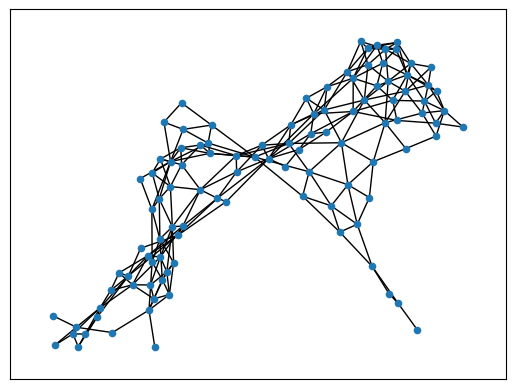

In [22]:
edges = show_graph_with_labels(adjanceny_matrix_zeroed.values, adjanceny_matrix_zeroed.columns.tolist())

In [23]:
# Creating the adjacenjy matrix
import shapefile
import itertools
import os
#from haversine import haversine

myshp = open(os.path.join(os.getcwd(),"./Data/shapefiles/Distribution/Areas.shp"), "rb")
mydbf = open(os.path.join(os.getcwd(),"./Data/shapefiles/Distribution/Areas.dbf"), "rb")
myshx= open(os.path.join(os.getcwd(),"./Data/shapefiles/Distribution/Areas.shx"), "rb")

r = shapefile.Reader(shp=myshp, dbf=mydbf, shx=myshx)

# Getting postcode midpoints
fields = r.records()
fields = [x[0] for x in fields]

# Getting shapes
shapes = r.shapes()

# Compiling into dictionary
data = {keys:values for (keys,values) in zip(fields,shapes)}

In [24]:
import numpy as np

def polygon_area(xs, ys):
    """https://en.wikipedia.org/wiki/Centroid#Of_a_polygon"""
    # https://stackoverflow.com/a/30408825/7128154
    return 0.5 * (np.dot(xs, np.roll(ys, 1)) - np.dot(ys, np.roll(xs, 1)))

def polygon_centroid(xs, ys):
    """https://en.wikipedia.org/wiki/Centroid#Of_a_polygon"""
    xy = np.array([xs, ys])
    c = np.dot(xy + np.roll(xy, 1, axis=1),
               xs * np.roll(ys, 1) - np.roll(xs, 1) * ys
               ) / (6 * polygon_area(xs, ys))
    return c

import tqdm
import time
centroids = dict()
for PA,shp in tqdm.tqdm(data.items()):
    time.sleep(0.1)
    xs = list()
    ys = list()
    for x,y in shp.points:
        xs.append(x)
        ys.append(y)
    
    x_mean = sum(xs)/len(xs)
    y_mean = sum(ys)/len(ys)
    centroids[PA] = (x_mean,y_mean)

centroids

100%|██████████| 124/124 [00:13<00:00,  9.10it/s]


{'AB': (-2.201381727378353, 57.4385880260874),
 'AL': (-0.2936788542179847, 51.78175940943029),
 'B': (-1.8965001642503607, 52.46173014052012),
 'BA': (-2.462131258556518, 51.160700530010125),
 'BB': (-2.3402396114186037, 53.789158546932256),
 'BD': (-1.8655687001258248, 53.851959798361676),
 'BH': (-1.9799203224204422, 50.68982660402734),
 'BL': (-2.3890333155651766, 53.576588943457196),
 'BN': (-0.06679069893395664, 50.82475917297892),
 'BR': (0.035044993443068294, 51.399746916060884),
 'BS': (-2.7337244260929143, 51.45397533494825),
 'CA': (-3.332902390256513, 54.71461913922518),
 'CB': (0.22606415496888127, 52.19374512326875),
 'CF': (-3.3751083975929372, 51.480802205032326),
 'CH': (-3.074866927419917, 53.3025264209351),
 'CM': (0.675314058273223, 51.72669674779797),
 'CO': (1.0478636383577415, 51.86976061193931),
 'CR': (-0.11316574513756003, 51.37314489423506),
 'CT': (1.2494208323761873, 51.240674242764605),
 'CV': (-1.515874019400739, 52.34106163609418),
 'CW': (-2.44956424538

In [31]:
from matplotlib import pyplot as plt
import networkx as nx

def show_graph_with_labels_points(adjacency_matrix, mylabels,points):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw_networkx(gr, points,node_size=20, labels=mylabels, with_labels=False)
    plt.show()
    return list(zip(rows.tolist(), cols.tolist()))

In [38]:
new_centroids = dict()
for col in adjanceny_matrix_zeroed.columns:
    new_centroids[col] = centroids[col]

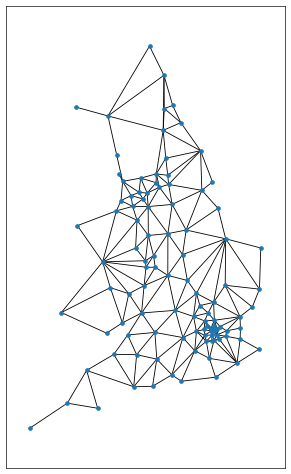

In [43]:
fig = plt.figure(1, figsize=(6, 10), dpi=60)
edges = show_graph_with_labels_points(adjanceny_matrix_zeroed.values, adjanceny_matrix_zeroed.columns.tolist(),list(new_centroids.values()))